In [1]:
import numpy as np
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import decode_predictions
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
# Load image and convert to 4-dimensional tensor.
image = load_img('../data/dog.jpg', target_size=(224, 224))
image_np = img_to_array(image)
image_np = np.expand_dims(image_np, axis=0)

predictions =  [[('n02091134', 'whippet', 0.5205725), ('n02110063', 'malamute', 0.067561224), ('n02109961', 'Eskimo_dog', 0.056865454), ('n02104029', 'kuvasz', 0.03953512), ('n02115641', 'dingo', 0.033186063)]]


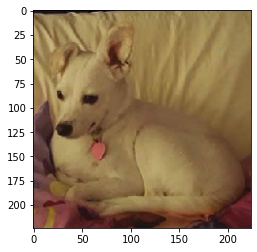

In [3]:
# Load the pretrained model.
model = resnet50.ResNet50(weights='imagenet')

# Standardize input data.
X = resnet50.preprocess_input(image_np.copy())

# Do prediction.
y = model.predict(X)
predicted_labels = decode_predictions(y)
print('predictions = ', predicted_labels)

# Show image.
plt.imshow(np.uint8(image_np[0]))
plt.show()